see more on https://github.com/rigvedrs/YOLO-V8-CAM

In [1]:
import sys
sys.path.append('../')

import ultralytics
import io
import requests
import torch
from yolo_cam.utils.image import show_cam_on_image
from yolo_cam.eigen_cam import EigenCAM
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
HoiHa_2_41 = cv2.imread(
    "../gt/images/test/HoiHa_2_41.jpg")
rgb_HoiHa_2_41 = HoiHa_2_41.copy()
HoiHa_2_41 = np.float32(HoiHa_2_41) / 255


0: 640x640 3 Ys, 25.0ms
Speed: 4.0ms preprocess, 25.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


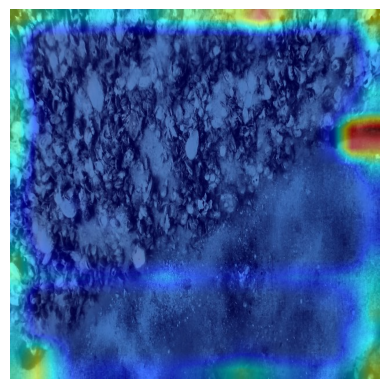

In [12]:
n_model = YOLO("../model/yolo8nb25/weights/best.pt")
n_target_layers = [n_model.model.model[-4]]

n_cam = EigenCAM(n_model, n_target_layers, task="od")
n_grayscale_cam = n_cam(rgb_HoiHa_2_41)[0, :, :]
n_cam_image = show_cam_on_image(HoiHa_2_41, n_grayscale_cam, use_rgb=True)
plt.imshow(n_cam_image)
plt.axis("off")
plt.savefig("eigencam_n_HoiHa_2_41.png", dpi=600,
            bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()


0: 640x640 2 Ys, 9.9ms
Speed: 1.0ms preprocess, 9.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


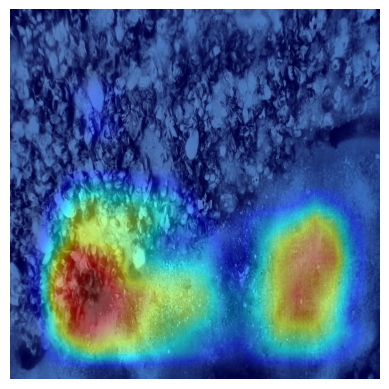

In [4]:
s_model = YOLO("../model/yolo8sb25/weights/best.pt")
s_target_layers = [s_model.model.model[-4]]

s_cam = EigenCAM(s_model, s_target_layers, task="od")
s_grayscale_cam = s_cam(rgb_HoiHa_2_41)[0, :, :]
s_cam_image = show_cam_on_image(HoiHa_2_41, s_grayscale_cam, use_rgb=True)
plt.imshow(s_cam_image)
plt.axis("off")
plt.savefig("eigencam_s_HoiHa_2_41.png", dpi=600,
            bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()


0: 640x640 1 Y, 15.4ms
Speed: 1.6ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


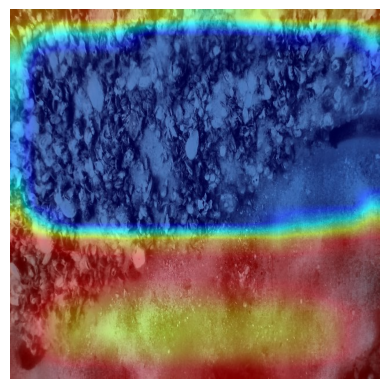

In [5]:
m_model = YOLO("../model/yolo8mb25/weights/best.pt")
m_target_layers = [m_model.model.model[-3]]

m_cam = EigenCAM(m_model, m_target_layers, task="od")
m_grayscale_cam = m_cam(rgb_HoiHa_2_41)[0, :, :]
m_cam_image = show_cam_on_image(HoiHa_2_41, m_grayscale_cam, use_rgb=True)
plt.imshow(m_cam_image)
plt.axis("off")
plt.savefig("eigencam_m_HoiHa_2_41.png", dpi=600,
            bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()


0: 640x640 1 Y, 25.3ms
Speed: 1.8ms preprocess, 25.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


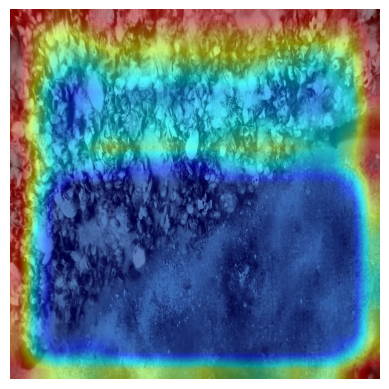

In [6]:
l_model = YOLO("../model/yolo8lb25/weights/best.pt")
l_target_layers = [l_model.model.model[-4]]

l_cam = EigenCAM(l_model, l_target_layers, task="od")
l_grayscale_cam = l_cam(rgb_HoiHa_2_41)[0, :, :]
l_cam_image = show_cam_on_image(HoiHa_2_41, l_grayscale_cam, use_rgb=True)
plt.imshow(l_cam_image)
plt.axis("off")
plt.savefig("eigencam_l_HoiHa_2_41.png", dpi=600,
            bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()


0: 640x640 2 Ys, 37.6ms
Speed: 2.0ms preprocess, 37.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


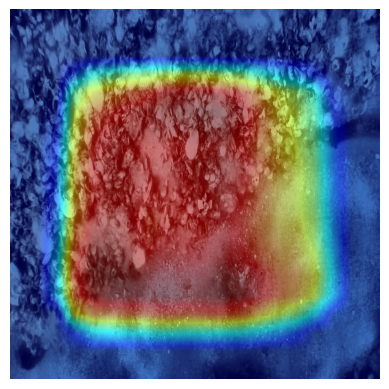

In [7]:
x_model = YOLO("../model/yolo8xb25/weights/best.pt")
x_target_layers = [x_model.model.model[-4]]

x_cam = EigenCAM(x_model, x_target_layers, task="od")
x_grayscale_cam = x_cam(rgb_HoiHa_2_41)[0, :, :]
x_cam_image = show_cam_on_image(HoiHa_2_41, x_grayscale_cam, use_rgb=True)
plt.imshow(x_cam_image)
plt.axis("off")
plt.savefig("eigencam_x_HoiHa_2_41.png", dpi=600,
            bbox_inches="tight", pad_inches=0, transparent=True)
plt.show()

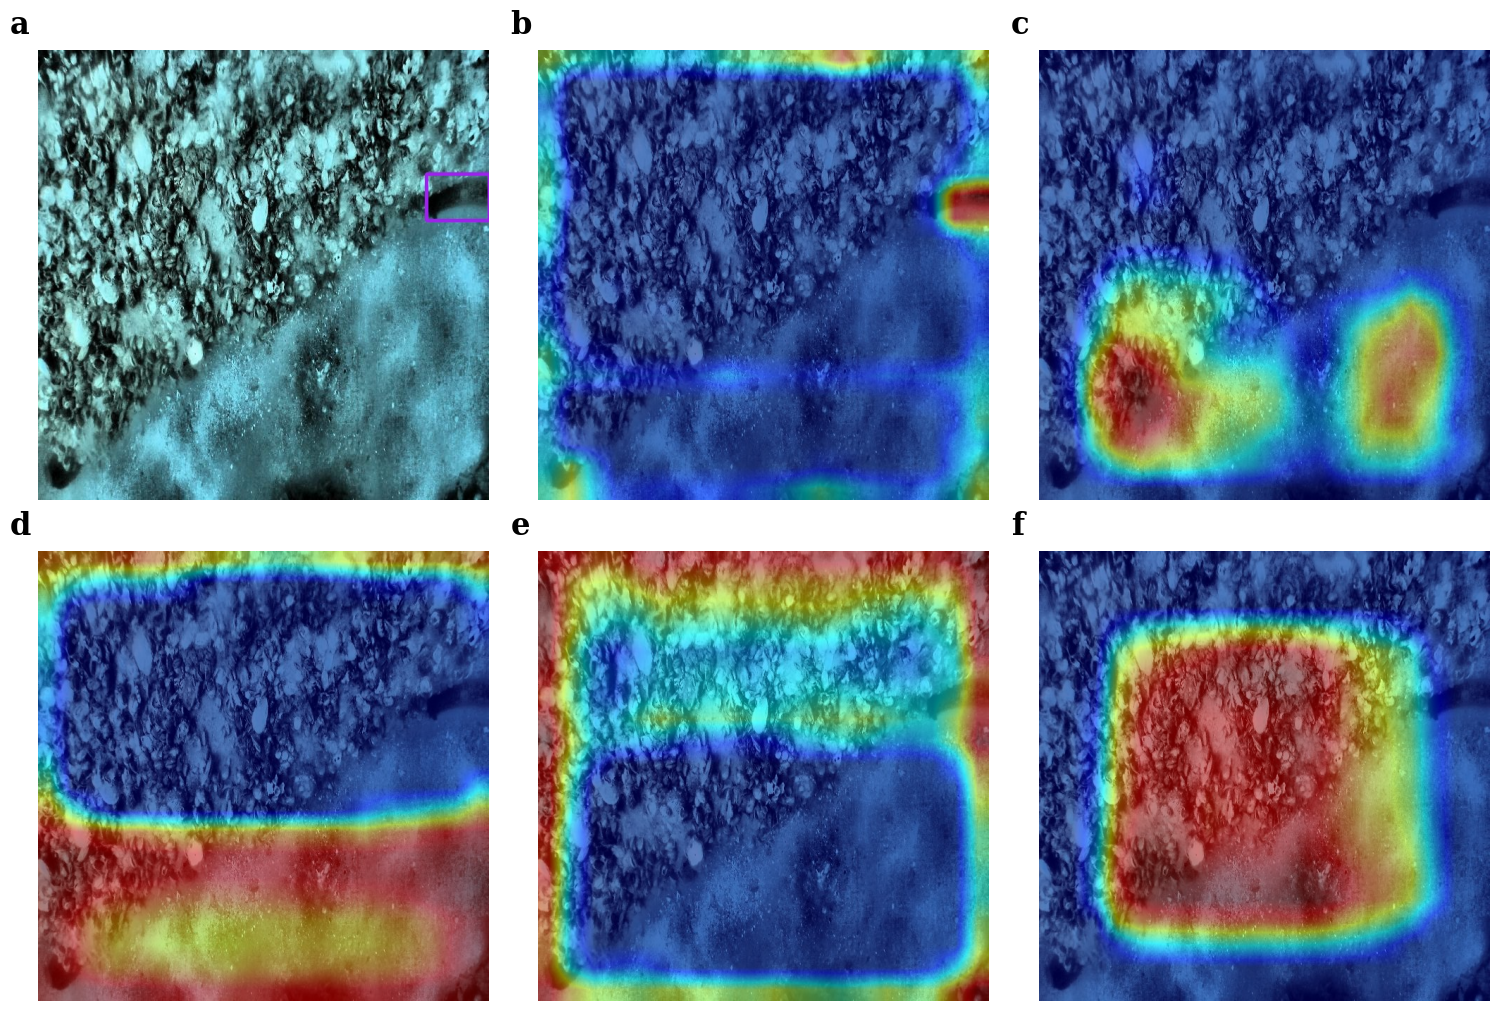

In [13]:
import matplotlib.pyplot as plt
from matplotlib import transforms

fig, axs = plt.subplot_mosaic(
    [['a', 'b', 'c'], ['d', 'e', 'f']], constrained_layout=True, figsize=(15, 10))

for label, ax in axs.items():
    trans = transforms.ScaledTranslation(-20 /
                                         72, 7 / 72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='22', va='bottom', fontfamily='serif', fontweight='bold', color='black')
    ax.set_axis_off()

# First subplot
ax = axs['a']
gt = cv2.imread("../gt/bbox/gt_HoiHa_2_41.jpg")
ax.imshow(gt)

# Second subplot
ax = axs['b']
ax.imshow(n_cam_image)

# Third subplot
ax = axs['c']
ax.imshow(s_cam_image)

# Forth subplot
ax = axs['d']
ax.imshow(m_cam_image)

# Fifth subplot
ax = axs['e']
ax.imshow(l_cam_image)

# Sixth subplot
ax = axs['f']
ax.imshow(x_cam_image)

plt.savefig('plot_HoiHa_2_41.png', dpi=600,
            transparent=True, bbox_inches='tight')
plt.show()